In [92]:
import pandas as pd
import matplotlib.pyplot as plt

fuel = pd.read_csv("data/fuel.csv", sep=";")[:-1]
fuel = fuel.replace(',','.', regex = True)
fuel [["Benzine","Diesel","LPG"]] = fuel[["Benzine", "Diesel","LPG"]].map(lambda x: float(x))


In [97]:
fuel[["Benzine"]][:10]

fuel["Jaar"] = [int(datum[:4]) for datum in fuel["Perioden"]]
dates = [date.split(sep= " ") for date in fuel["Perioden"]]
fuel["Maand"] = [date[-1] for date in dates]
fuel.head()

dct = {"januari": 1, "februari": 2, "maart": 3, "april": 4, "mei": 5, "juni": 6, "juli":7, "augustus": 8, "september":9, "oktober":10, "november":11, "december":12}
fuel["Maand index"] = fuel["Maand"].map(dct)

fuel.isna().any()
fuel.head()

,Perioden,Benzine,Diesel,LPG,Jaar,Maand,Maand index
0,2006 zondag 1 januari,1.325,1.003,0.543,2006,januari,1
1,2006 maandag 2 januari,1.328,1.007,0.542,2006,januari,1
2,2006 dinsdag 3 januari,1.332,1.007,0.540,2006,januari,1
3,2006 woensdag 4 januari,1.348,1.020,0.550,2006,januari,1
4,2006 donderdag 5 januari,1.347,1.021,0.550,2006,januari,1


<Axes: xlabel='Jaar,Maand index'>

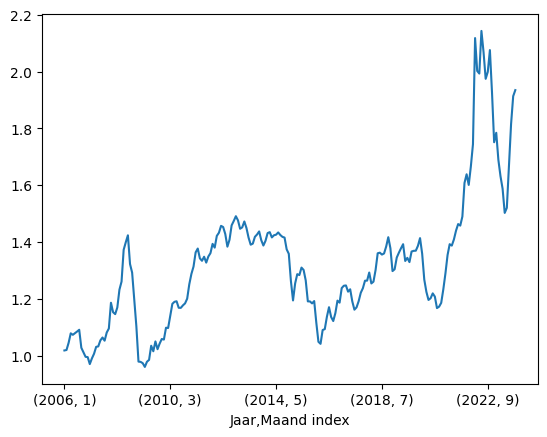

In [110]:
#years = [fuel[fuel["Jaar"] == year] for year in range(2006, 2024)]
#years[0][(years[0]["Maand index"]-1)//3 == 0]

years2 = fuel.groupby(["Jaar", "Maand index"])
meandata = years2["Diesel"].mean()

meandata.plot()


In [107]:
meandata

Jaar  Maand index
2006  1              1.017935
      2              1.019607
      3              1.045032
      4              1.078267
      5              1.073065
                       ...   
2023  6              1.520133
      7              1.668258
      8              1.814806
      9              1.913200
      10             1.934500
Name: Diesel, Length: 214, dtype: float64